### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
df = pd.read_csv('data/coupons.csv') # Read data and create dataframe

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
df.isnull().sum() # Missing Values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<Axes: >

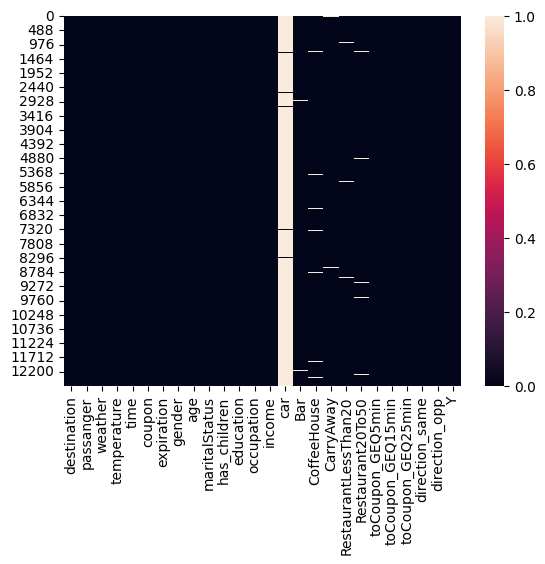

In [6]:
# Visualize missing values
sns.heatmap(df.isnull())


3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Drop car column, only 108 non-null values in whole dataset
df.drop('car', axis=1, inplace=True)

# Replace other missing values with mode, not many missing values in these columns so shouldn't skew the data too much if at all
df['Bar'] = df['Bar'].fillna(df['Bar'].mode()[0])
df['CoffeeHouse'] = df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0])
df['CarryAway'] = df['CarryAway'].fillna(df['CarryAway'].mode()[0])
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0])
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])

4. What proportion of the total observations chose to accept the coupon?



In [8]:
coupon_accepted_ratio = df['Y'].value_counts()[0] / len(df) 
coupon_accepted_ratio

# 43% of coupons are accepted

np.float64(0.4315673289183223)

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

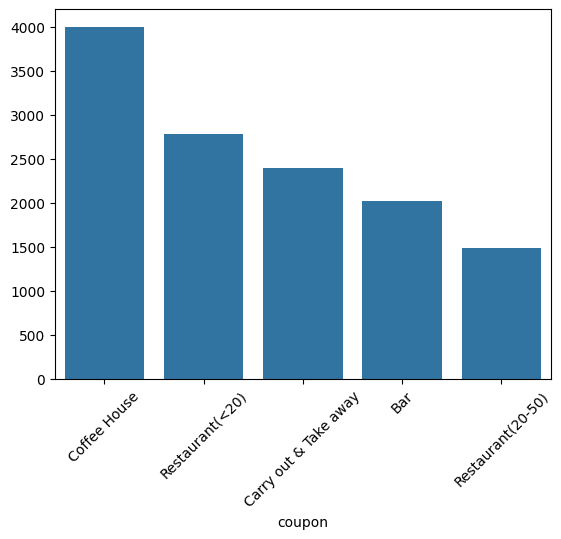

In [9]:
sns.barplot(x=df['coupon'].value_counts().index, y=df['coupon'].value_counts().values)
plt.xticks(rotation=45, )

# Plot number of coupon opportunities by category


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

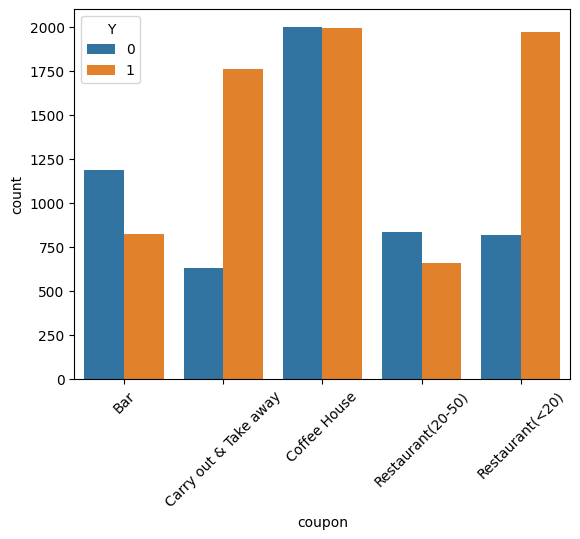

In [10]:
coupon_counts_by_category = df.groupby(['coupon', 'Y']).size().reset_index(name='count')
sns.barplot(data=coupon_counts_by_category, x='coupon', y='count', hue='Y')
plt.xticks(rotation=45, )
# Y=1 coupon accepted,      Y=0 coupon NOT accepted

6. Use a histogram to visualize the temperature column.

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

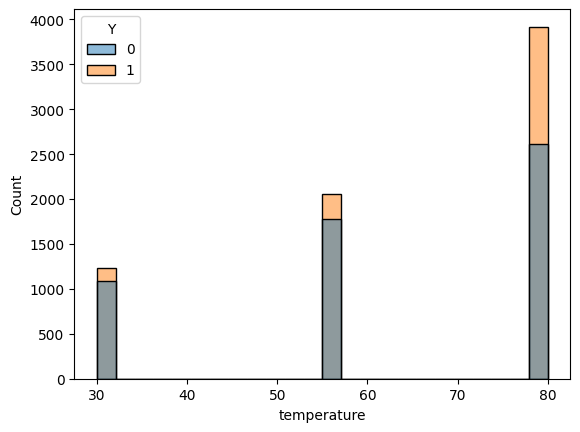

In [11]:
sns.histplot(data=df, x='temperature', hue='Y')
df['temperature'].value_counts()

# again, Y=1 is yes,     Y=0 is no
# Much more coupons were accepted when the temperature was warm

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_coupons_df = df[df['coupon'] == 'Bar']
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [13]:
bar_accepted_coupon_ratio = len(bar_coupons_df[bar_coupons_df['Y'] == 1]) / len(bar_coupons_df)
bar_accepted_coupon_ratio

# 41% of bar coupons were accepted

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
bar_3_or_less = bar_coupons_df[(bar_coupons_df['Bar'] == 'never') | (bar_coupons_df['Bar'] == 'less1') | (bar_coupons_df['Bar'] == '1~3')]
bar_more_than_3 = bar_coupons_df[(bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == 'gt8')]

In [15]:
len(bar_3_or_less[bar_3_or_less['Y'] == 1]) / len(bar_more_than_3[bar_more_than_3['Y'] == 1])

# People who went to bar more than 3 times were 4.4 times more likely to accept coupon

4.405228758169935

Text(0.5, 1.0, 'bar going frequency and coupon acceptance count')

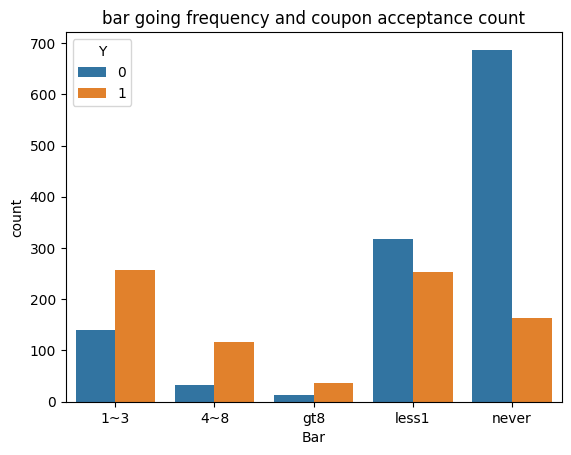

In [16]:
bar_coupon_decisions_df = bar_coupons_df.groupby('Bar')['Y'].value_counts().reset_index()
sns.barplot(data=bar_coupon_decisions_df, x='Bar', y='count', hue='Y')
plt.title('bar going frequency and coupon acceptance count')

# Graph shows that someone who goes to a bar more than once a month is more likely to accept a coupon than not, and those who go to bars more 3 times per week would rarely decline the coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'bar goer age and coupon acceptance')

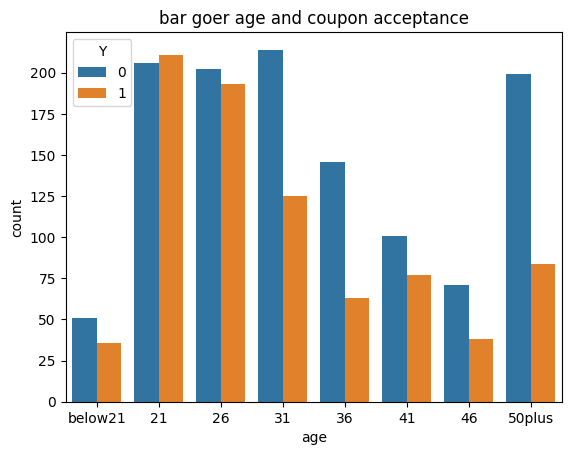

In [17]:
age_counts_df = bar_coupons_df[['age', 'Y']].value_counts()


ages_list = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
order_map = {age: i for i, age in enumerate(ages_list)}


age_counts_df = age_counts_df.sort_index(
    level='age',
    key=lambda index: index.map(order_map)
)


all_age_counts_df = age_counts_df.reset_index()
all_age_counts_df


sns.barplot(data=all_age_counts_df, x='age', y='count', hue='Y')
plt.title('bar goer age and coupon acceptance')

Text(0.5, 1.0, 'Frequent bar goers over the age of 25 and coupon acceptance')

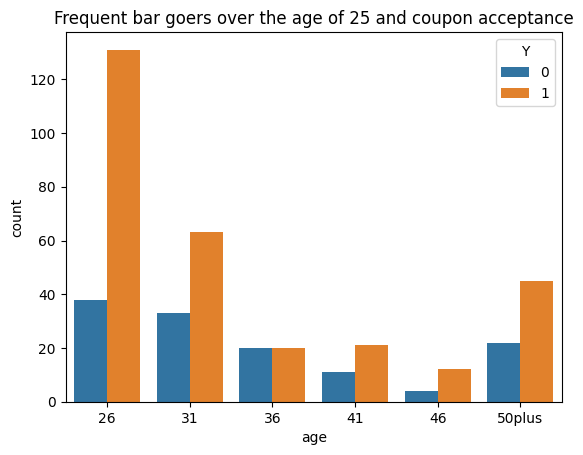

In [18]:
bar_info_df = bar_coupons_df[['age', 'Bar', 'occupation', 'passanger', 'maritalStatus', 'Y']].reset_index()


curr_df = bar_info_df[(bar_info_df['Bar'] != 'never') & (bar_info_df['Bar'] != 'less1') & (bar_info_df['age'] != '21') & (bar_info_df['age'] != 'below21')]

sns.barplot(data=curr_df[['age', 'Y']].groupby(['age', 'Y']).value_counts().reset_index(), x='age', y='count', hue='Y')
plt.title('Frequent bar goers over the age of 25 and coupon acceptance')


In [19]:
# From above graphs we can see that people who go to bars more than once a month and who are older than 25 are extremely likely to accept a coupon while driving by. 

In [20]:
df['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [21]:
xdf = bar_info_df[(bar_info_df['Bar'] != 'never') & (bar_info_df['Bar'] != 'less1') & (bar_info_df['age'] != '21') & (bar_info_df['age'] != 'below21')
            & (bar_info_df['passanger'] != 'Kid(s)') & (bar_info_df['occupation'] != 'Farming Fishing & Forestry')]

len(xdf[xdf['Y'] == 1]) / len(xdf)

# 73.5% chance that driver with all these attributes is likely to accept a bar coupon



0.7347480106100795

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [22]:
adf = bar_coupons_df[(bar_coupons_df['Bar'] != 'never') & (bar_coupons_df['Bar'] != 'less1') & (bar_coupons_df['age'] != '21') & (bar_coupons_df['age'] != 'below21')
            & (bar_coupons_df['passanger'] != 'Kid(s)') & (bar_coupons_df['maritalStatus'] != 'Widowed')]

bdf = bar_coupons_df[(bar_coupons_df['Bar'] != 'never') & (bar_coupons_df['Bar'] != 'less1') & ((bar_coupons_df['age'] == '21') | (bar_coupons_df['age'] == 'below21')
            | (bar_coupons_df['age'] == '26'))]

cdf = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'] != 'never') & (bar_coupons_df['RestaurantLessThan20'] != 'less1') & ((bar_coupons_df['income'] == 'Less than $12500')
            | (bar_coupons_df['income'] == '$12500 - $24999') | (bar_coupons_df['income'] == '$25000 - $37499') | (bar_coupons_df['income'] == '$37500 - $49999'))]

In [23]:
a = len(adf[adf['Y'] == 1]) / len(adf)
b = len(bdf[bdf['Y'] == 1]) / len(bdf)
c = len(cdf[cdf['Y'] == 1]) / len(cdf)

a/b

1.0180243520501102

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [24]:
# Based on observations in the data, it seems like frequent bar goers, who are young and single tend to accept far more bar coupons than any other demographic. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [25]:
df['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [26]:
# ------------ Coffee House Analysis ------------

In [27]:
coffee_df = df[df['coupon'] == 'Coffee House'].reset_index()


<Axes: xlabel='time', ylabel='Y'>

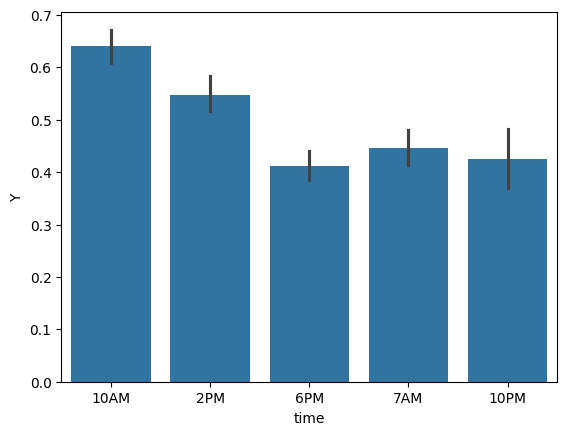

In [28]:
# Time vs Coupon Acceptance:
sns.barplot(data=coffee_df, x='time', y='Y')

# Plot shows that drivers are most likely to accept coupons in late morning and early afternoon


# (10 AM, 2 PM) are most likely

<Axes: xlabel='gender', ylabel='Y'>

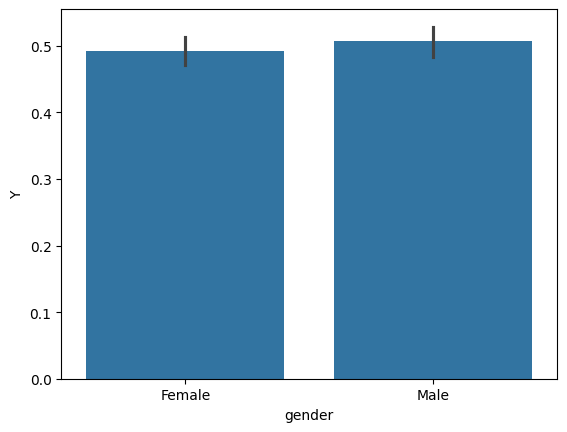

In [29]:
# Gender vs Coupon acceptance:
sns.barplot(data=coffee_df, x='gender', y='Y')

# coupon acceptance is about equal for male and female

Text(0.5, 1.0, 'Coffee House Frequency vs Coupon Acceptance')

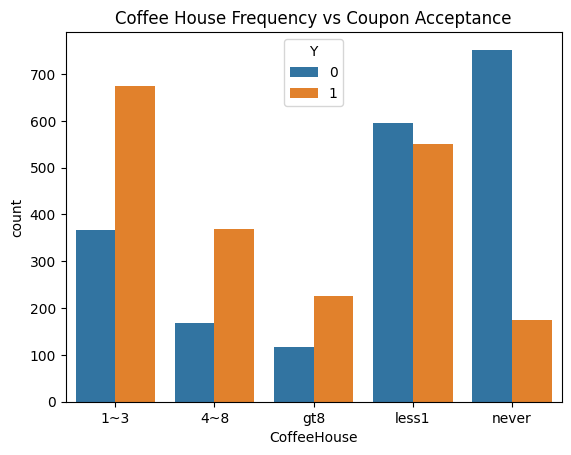

In [36]:
sns.barplot(data=coffee_df.groupby(['CoffeeHouse'])['Y'].value_counts().reset_index(), x='CoffeeHouse', y='count', hue='Y')
plt.title('Coffee House Frequency vs Coupon Acceptance')

Text(0.5, 1.0, 'Age vs Coffee House Coupon Acceptance')

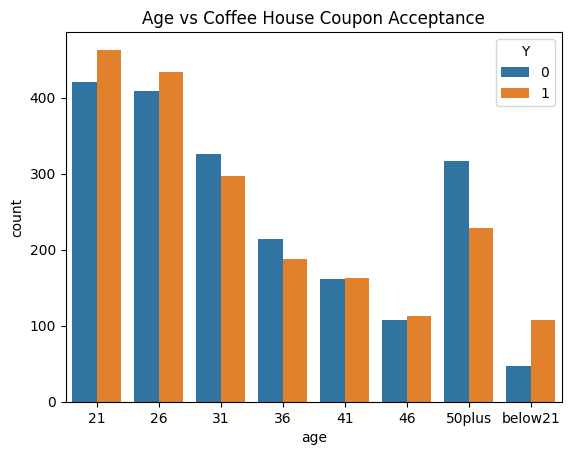

In [37]:
sns.barplot(data=coffee_df.groupby(['age'])['Y'].value_counts().reset_index(), x='age', y='count', hue='Y')
plt.title('Age vs Coffee House Coupon Acceptance')


In [32]:
coffee_df_2 = coffee_df[(coffee_df['CoffeeHouse'] != 'never') & (coffee_df['CoffeeHouse'] != 'less1') & (coffee_df['age'] != '50plus') & (coffee_df['age'] != '46') &
           (coffee_df['age'] != '41') & (coffee_df['age'] != '36') & (coffee_df['age'] != '31')]

len(coffee_df_2[coffee_df_2['Y'] == 1]) / len(coffee_df_2)

# 69% of coffee house regulars under the age of 31 would accept a coupon

0.6893401015228426

Text(0.5, 1.0, 'Outside Temp vs Coffee House Coupon Acceptance')

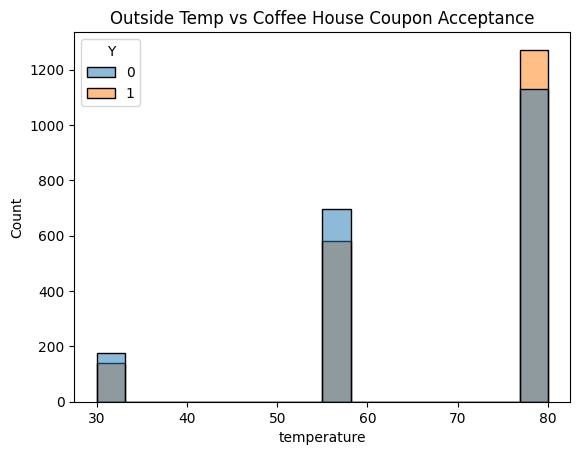

In [38]:
sns.histplot(data=coffee_df, x='temperature', hue='Y')
plt.title('Outside Temp vs Coffee House Coupon Acceptance')

Text(0.5, 1.0, 'Occupation vs Coffee House Coupon Acceptance')

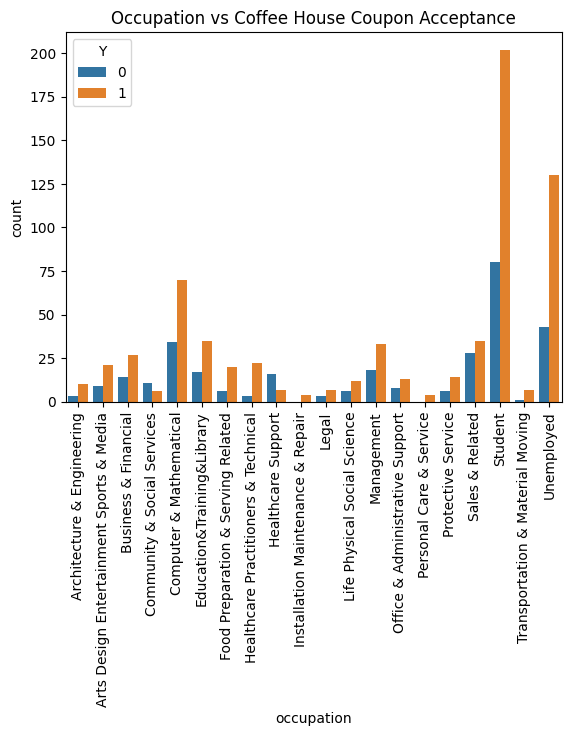

In [39]:
sns.barplot(data=coffee_df_2.groupby(['occupation'])['Y'].value_counts().reset_index(), x='occupation', y='count', hue='Y')
plt.xticks(rotation=90)
plt.title('Occupation vs Coffee House Coupon Acceptance')

#Looks like people that are most likely to accept a coupon are students, people in computer/mathemematical fields, and those who are unemployed (Students and unemployed primarily)

In [35]:
# Target consumers for coffee shop coupons should be younger people who are unemployed or students and when it's warm out.